In [1]:
from google.colab import files
uploaded = files.upload()

Saving stc TV Data Set_T2.xlsx to stc TV Data Set_T2.xlsx


In [2]:
import pandas as pd

In [5]:
!pip install pyxlsb

In [8]:
import pandas as pd

# قراءة الملف مباشرة (أول شيت تلقائيًا)
df = pd.read_excel(
    list(uploaded.keys())[0],
    engine='openpyxl'
)

# عرض أول 5 صفوف للتأكد
df.head()

,Unnamed: 0,date_,Total_watch_time_in_houres
0,0,2018-01-01,1123.551944
1,1,2018-01-02,1000.129722
2,2,2018-01-03,881.924444
3,3,2018-01-04,782.669444
4,4,2018-01-05,1051.939444


In [12]:
import pandas as pd

filename = "stc TV Data Set_T2.xlsx"  # أو انسخ الاسم من الخطوة 2 بالضبط
df = pd.read_excel(filename, index_col=0)

print(df.head())

       date_  Total_watch_time_in_houres
0 2018-01-01                 1123.551944
1 2018-01-02                 1000.129722
2 2018-01-03                  881.924444
3 2018-01-04                  782.669444
4 2018-01-05                 1051.939444


            Total_watch_time_in_houres
date_                                 
2018-01-01                 1123.551944
2018-01-02                 1000.129722
2018-01-03                  881.924444
2018-01-04                  782.669444
2018-01-05                 1051.939444


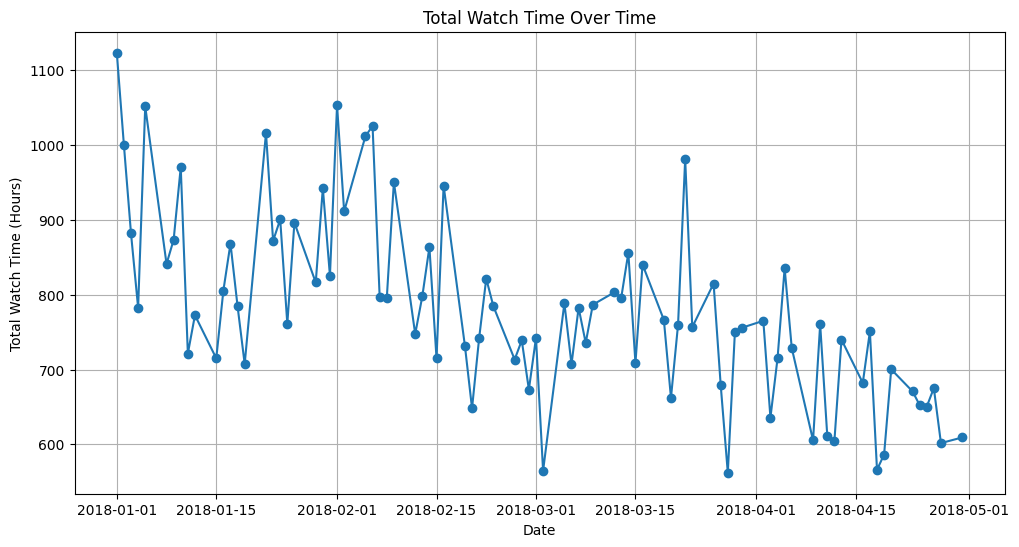

In [13]:
import pandas as pd

# تحويل العمود لتاريخ
df['date_'] = pd.to_datetime(df['date_'])

# تعيين التاريخ كفهرس (اختياري لكنه يساعد في التحليل الزمني)
df.set_index('date_', inplace=True)

# عرض أول خمس صفوف للتأكد
print(df.head())

# رسم بيانات وقت المشاهدة الكلي
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Total_watch_time_in_houres'], marker='o')
plt.title('Total Watch Time Over Time')
plt.xlabel('Date')
plt.ylabel('Total Watch Time (Hours)')
plt.grid(True)
plt.show()

In [16]:
data = pd.read_excel('stc TV Data Set_T2.xlsx')

Missing values per column:
Unnamed: 0                    0
date_                         0
Total_watch_time_in_houres    0
dtype: int64

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  86 non-null     int64         
 1   date_                       86 non-null     datetime64[ns]
 2   Total_watch_time_in_houres  86 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 KB
None

Descriptive statistics:
count      86.000000
mean      780.817926
std       122.992002
min       562.124722
25%       707.709653
50%       763.181389
75%       840.985278
max      1123.551944
Name: Total_watch_time_in_houres, dtype: float64


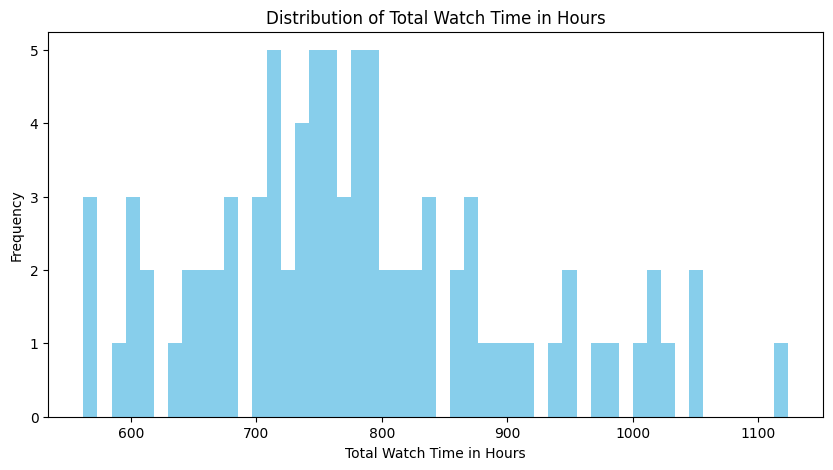

In [17]:
# فحص القيم المفقودة
print("Missing values per column:")
print(data.isnull().sum())

# معلومات عن نوع البيانات وعدد الصفوف
print("\nData info:")
print(data.info())

# إحصائيات وصفية للعمود الرقمي
print("\nDescriptive statistics:")
print(data['Total_watch_time_in_houres'].describe())

# رسم توزيع المشاهدات للتأكد من القيم الشاذة
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data['Total_watch_time_in_houres'], bins=50, color='skyblue')
plt.title('Distribution of Total Watch Time in Hours')
plt.xlabel('Total Watch Time in Hours')
plt.ylabel('Frequency')
plt.show()

In [19]:
# إعادة تسمية الأعمدة كما يتطلب Prophet
df = data.reset_index().rename(columns={
    "date_": "ds",
    "Total_watch_time_in_houres": "y"
})

# عرض أول 5 صفوف للتأكد
df.head()

,index,Unnamed: 0,ds,y
0,0,0,2018-01-01,1123.551944
1,1,1,2018-01-02,1000.129722
2,2,2,2018-01-03,881.924444
3,3,3,2018-01-04,782.669444
4,4,4,2018-01-05,1051.939444


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0fihj347/fcb20umj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0fihj347/7t_9grdc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24092', 'data', 'file=/tmp/tmp0fihj347/fcb20umj.json', 'init=/tmp/tmp0fihj347/7t_9grdc.json', 'output', 'file=/tmp/tmp0fihj347/prophet_modelf18ta4s6/prophet_model-20250806081802.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:18:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:18:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


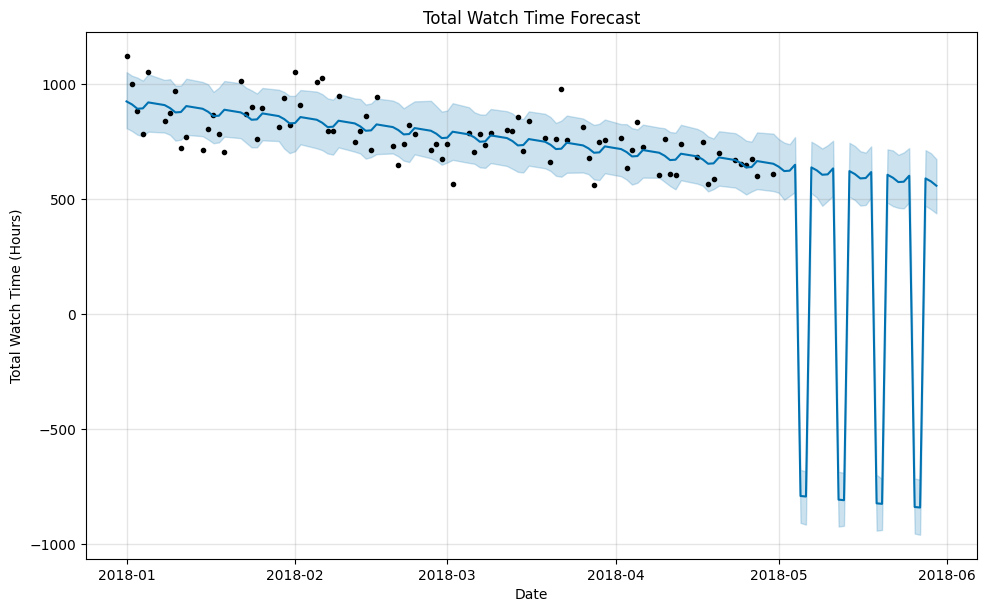

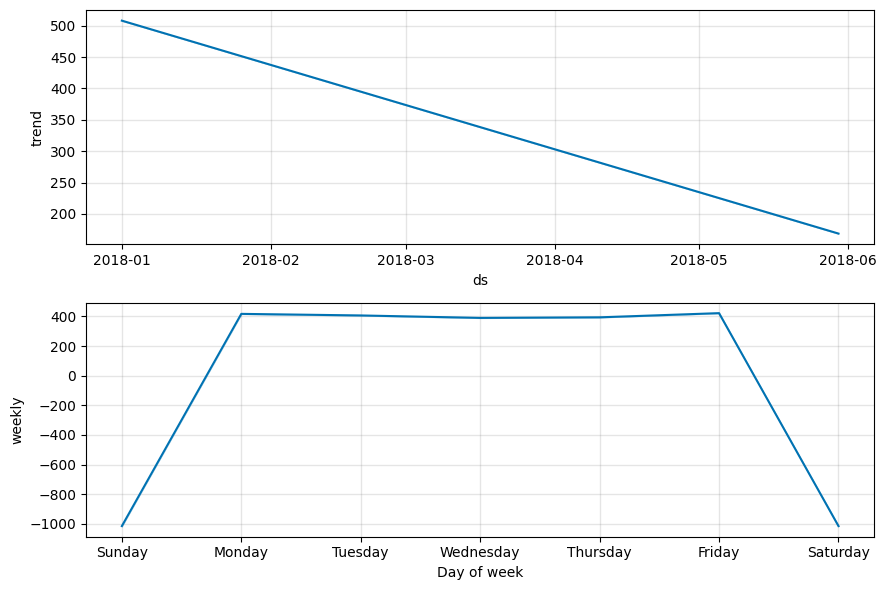

In [22]:
# 1. استيراد المكتبات
from prophet import Prophet
import matplotlib.pyplot as plt

# 2. تجهيز البيانات (إذا ما سويتها من قبل)
df = df.rename(columns={"date_": "ds", "Total_watch_time_in_houres": "y"})

# 3. إنشاء النموذج
model = Prophet()

# 4. تدريب النموذج
model.fit(df)

# 5. إنشاء إطار التوقع للمستقبل (مثلاً 30 يوم قدام)
future = model.make_future_dataframe(periods=30)

# 6. عمل التوقع
forecast = model.predict(future)

# 7. رسم التوقعات
fig1 = model.plot(forecast)
plt.title("Total Watch Time Forecast")
plt.xlabel("Date")
plt.ylabel("Total Watch Time (Hours)")
plt.show()

# 8. تحليل المكونات (اتجاه + موسمية أسبوعية)
fig2 = model.plot_components(forecast)
plt.show()

In [23]:
forecast[['ds', 'yhat']].tail(30)

,ds,yhat
86,2018-05-01,641.705760
87,2018-05-02,622.752681
88,2018-05-03,624.402901
89,2018-05-04,650.397383
90,2018-05-05,-790.488720
91,2018-05-06,-792.766790
92,2018-05-07,638.672640
93,2018-05-08,625.758790
94,2018-05-09,606.805712
95,2018-05-10,608.455931


In [24]:
# نفترض إن 'forecast' هو DataFrame فيه نتائج التوقعات

# نأخذ فقط الأعمدة المهمة: التاريخ 'ds' والقيمة المتوقعة 'yhat'
next_30_days = forecast[['ds', 'yhat']].tail(30)

# نطبع الجدول بشكل مرتب
print(next_30_days.to_string(index=False))

        ds        yhat
2018-05-01  641.705760
2018-05-02  622.752681
2018-05-03  624.402901
2018-05-04  650.397383
2018-05-05 -790.488720
2018-05-06 -792.766790
2018-05-07  638.672640
2018-05-08  625.758790
2018-05-09  606.805712
2018-05-10  608.455931
2018-05-11  634.450413
2018-05-12 -806.435690
2018-05-13 -808.713760
2018-05-14  622.725670
2018-05-15  609.811820
2018-05-16  590.858742
2018-05-17  592.508961
2018-05-18  618.503443
2018-05-19 -822.382660
2018-05-20 -824.660730
2018-05-21  606.778700
2018-05-22  593.864851
2018-05-23  574.911772
2018-05-24  576.561991
2018-05-25  602.556473
2018-05-26 -838.329630
2018-05-27 -840.607699
2018-05-28  590.831730
2018-05-29  577.917881
2018-05-30  558.964802


In [25]:
import pandas as pd

# نتحقق أن العمود ds هو datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# نفلتر بيانات الشهرين القادمين من أول يوم بعد آخر تاريخ عندك في البيانات الأصلية
# لو آخر تاريخ في بياناتك الأصلية هو '2018-03-28' مثلاً
start_date = forecast['ds'].min()  # أو آخر تاريخ بيانات فعلية عندك + 1 يوم
end_date = start_date + pd.DateOffset(months=2)

future_data = forecast[(forecast['ds'] >= start_date) & (forecast['ds'] < end_date)]

# 1. أعلى 10 أيام من ساعات المشاهدة
top_10_days = future_data.nlargest(10, 'yhat')[['ds', 'yhat']]

print("Top 10 peak days with highest watch time:")
print(top_10_days)

# 2. إحصائيات عامة
summary_stats = future_data['yhat'].describe()

print("\nSummary statistics for next 2 months watch time prediction:")
print(summary_stats)

Top 10 peak days with highest watch time:
           ds        yhat
0  2018-01-01  925.718096
4  2018-01-05  921.495869
1  2018-01-02  912.804246
5  2018-01-08  909.771126
9  2018-01-12  905.548900
6  2018-01-09  896.857277
3  2018-01-04  895.501387
2  2018-01-03  893.851168
10 2018-01-15  893.824157
14 2018-01-19  889.601931

Summary statistics for next 2 months watch time prediction:
count     43.000000
mean     849.117131
std       42.198028
min      766.275411
25%      814.941430
50%      847.660479
75%      880.232363
max      925.718096
Name: yhat, dtype: float64
